<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Data Dictionary

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- trtbps : resting blood pressure (in mm Hg)

- ca: number of major vessels (0-3)

- cp : Chest Pain type

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Notebook Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

import scikitplot as skplt

import tensorflow as tf

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Importing Data

In [4]:
data = pd.read_csv('Data/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Here `output` of 0 signifies that a person has low chances of heart attack while 1 suggests that the person has higher chances of heart attack

In [5]:
print(f'Number of rows:', data.shape[0])
print(f'Number of columns:', data.shape[1])

Number of rows: 303
Number of columns: 14


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Data Preprocessing

In [6]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

#### We have 5 numerical features and 8 categorical features in our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### All of our categorical columns have an integer datatype. I will convert them into an object datatype

In [8]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_columns = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
data[cat_columns] = data[cat_columns].astype(str)

In [9]:
data.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### Median and mean values of all the numerical features we have are comparable. Therefore, I don't think there are any outliers in our numerical features

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Missing Values

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### We don't have any missing values in our dataset

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Exploratory Data Analysis

### Let us start by checking how our numerical features change based on our target variable

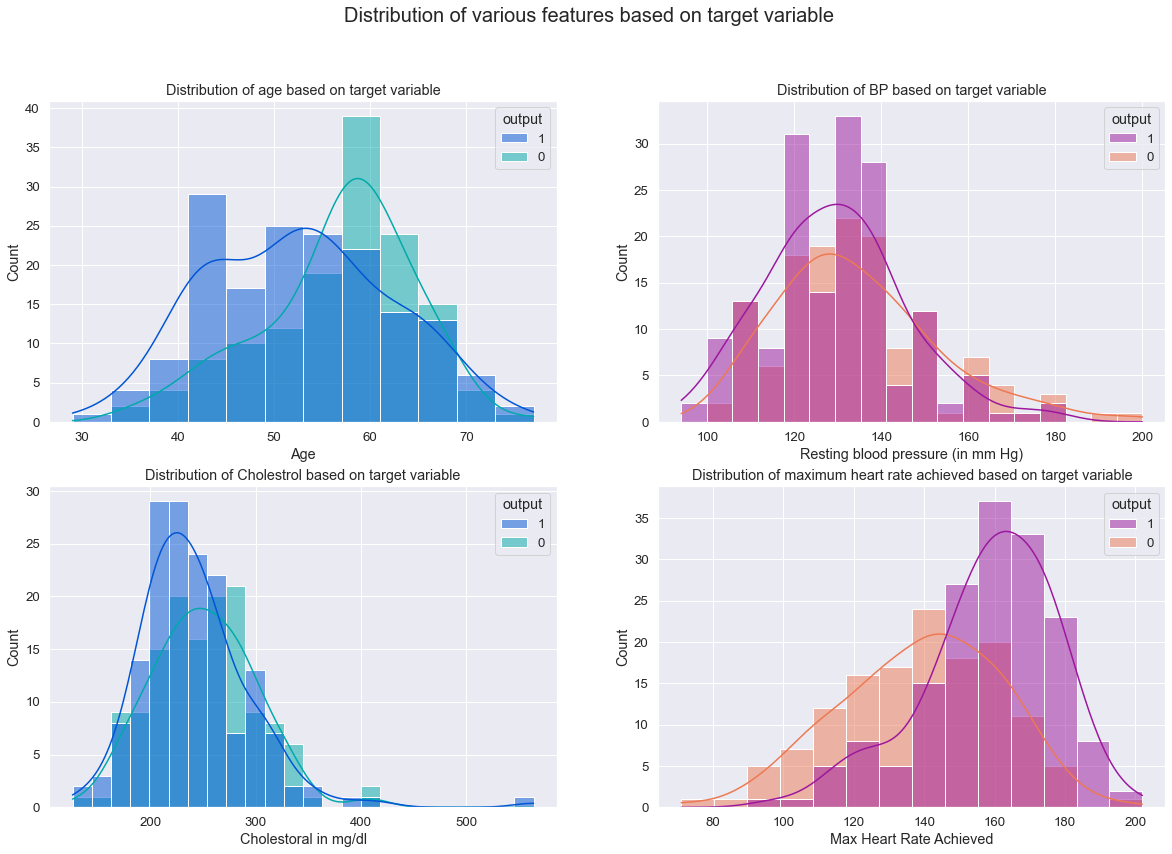

In [11]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= data, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= data, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= data, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= data, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

#### We can clearly spot a pattern in the distribution of maximum heart rate achieved. Those who have reached a higher maximum heart rate are more likely to have a heart attack

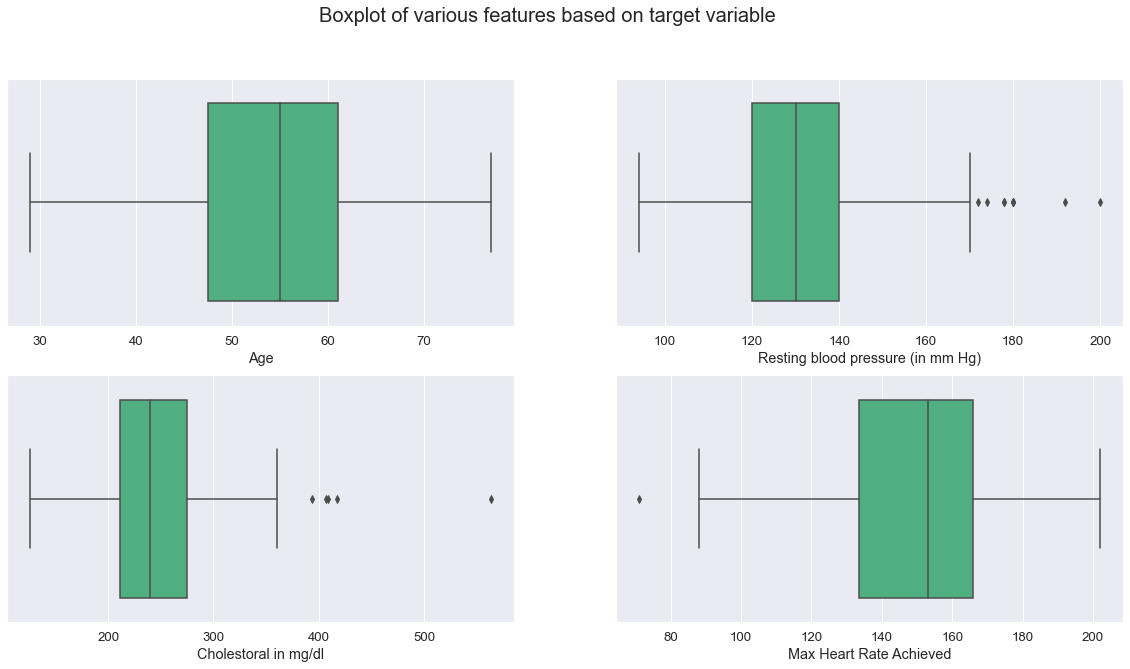

In [12]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

plt.suptitle('Boxplot of various features based on target variable', fontsize = 20)

ax1 = sns.boxplot(x ='age', data= data, ax= ax[0, 0], color = '#40bf80')
ax1.set(xlabel = 'Age')

ax2 = sns.boxplot(x ='trtbps', data= data, ax= ax[0, 1], color='#40bf80')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)')

ax3 = sns.boxplot(x ='chol', data= data, hue= 'output', ax= ax[1, 0], color= '#40bf80')
ax3.set(xlabel = 'Cholestoral in mg/dl')

ax4 = sns.boxplot(x ='thalachh', data= data, ax= ax[1, 1], color = '#40bf80')
ax4.set(xlabel = 'Max Heart Rate Achieved')

plt.show()

#### There are definitely some outliers in the Blood Pressure and cholestrol column

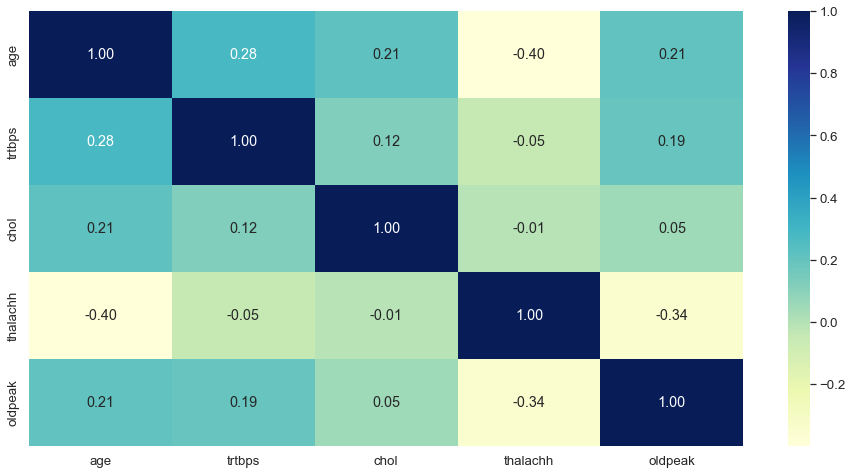

In [13]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

#### I don't think there is any correlation between our numerical features

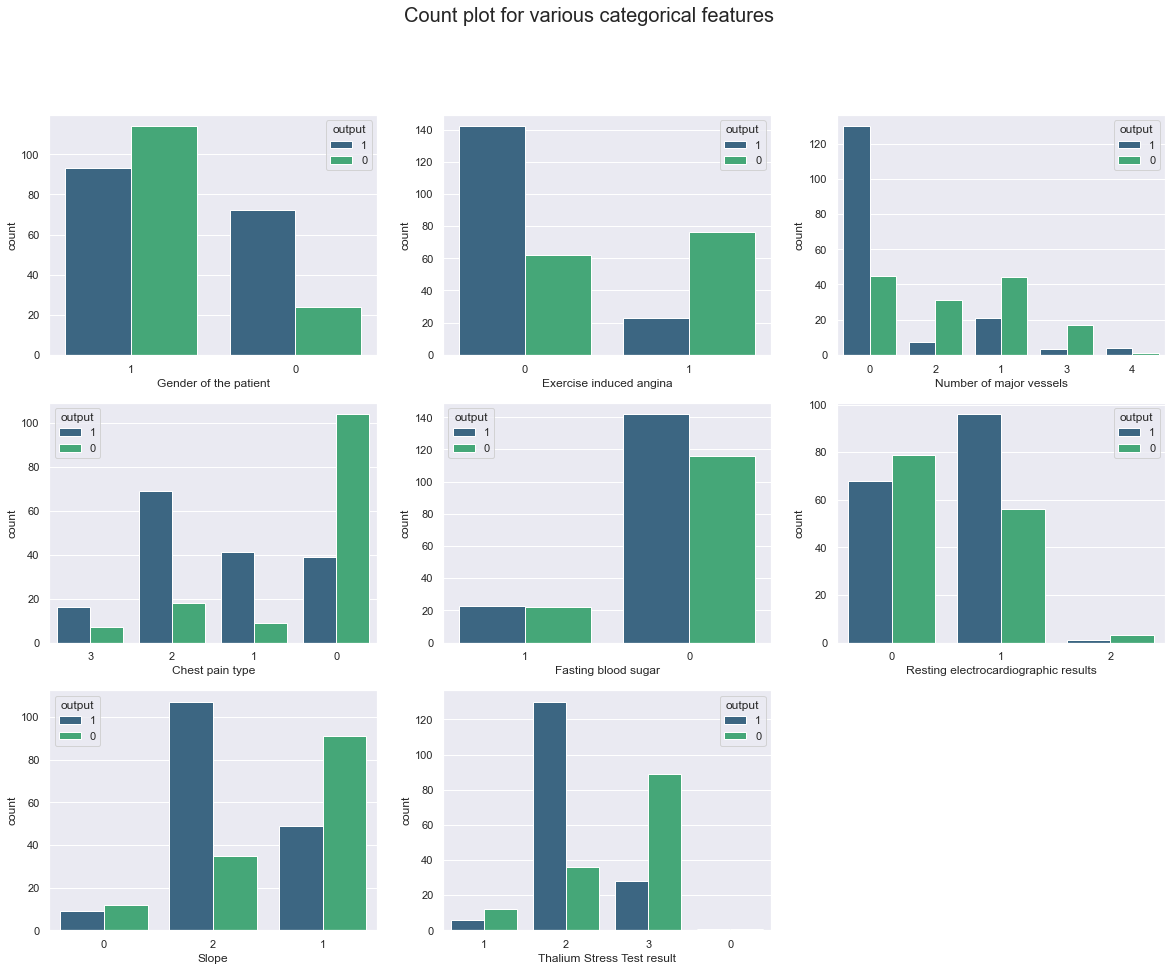

In [14]:
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= data, ax= ax[0, 0], hue = 'output' ,palette= 'viridis')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= data, hue= 'output', ax= ax[0, 1], palette= 'viridis')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= data, ax= ax[0, 2], hue = 'output', palette= 'viridis')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= data, hue = 'output', ax= ax[1, 0], palette= 'viridis')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= data, hue = 'output', ax= ax[1, 1], palette= 'viridis')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= data, ax= ax[1, 2], hue = 'output', palette= 'viridis')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= data, ax= ax[2, 0], hue = 'output', palette= 'viridis')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= data, ax= ax[2, 1], hue = 'output', palette= 'viridis')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()

In [15]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

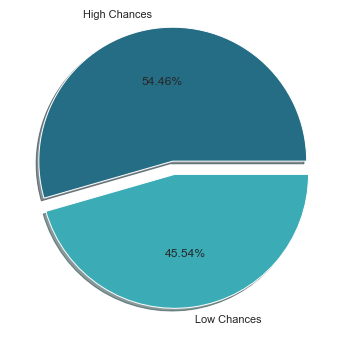

In [16]:
plt.figure(figsize= (6, 8))
data_pie  = [165 , 138]
labels = ["High Chances", "Low Chances"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.show()

#### It seems like we have a fairly balanced dataset

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Checking For Skewness

In [17]:
def skewness(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    return skew_df

In [18]:
skewness(data=data[num_columns])

,Feature,Skew,Absolute Skew
0,age,-0.201460,0.201460
1,trtbps,0.710230,0.710230
2,oldpeak,1.263426,1.263426
3,chol,1.137733,1.137733
4,thalachh,-0.534746,0.534746


In [19]:
# oldpeak and chol columns are skewed, therefore I will apply log transformation
data['oldpeak'] = np.log1p(data['oldpeak'])
data['chol'] = np.log1p(data['chol'])

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Encoding

In [20]:
data = pd.get_dummies(data, drop_first=True)

In [21]:
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,63,145,5.455321,150,1.193922,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,5.525453,187,1.504077,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,5.323010,172,0.875469,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,5.468060,178,0.587787,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,5.872118,163,0.470004,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Feature Scaling 

In [22]:
X = data.drop('output_1', axis= 1)
y = data.output_1

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,random_state= 42)

In [25]:
print(X_train.shape)

(242, 22)


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Training ANN

In [26]:
model = tf.keras.Sequential([
    tf.keras.Input(22),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20)

Epoch 1/50
7/7 [==============================] - 2s 105ms/step - loss: 0.7543 - auc: 0.4503 - val_loss: 0.6765 - val_auc: 0.6488
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6695 - auc: 0.6655 - val_loss: 0.6080 - val_auc: 0.7866
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5981 - auc: 0.7862 - val_loss: 0.5589 - val_auc: 0.8308
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5514 - auc: 0.8284 - val_loss: 0.5247 - val_auc: 0.8444
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4929 - auc: 0.8831 - val_loss: 0.4996 - val_auc: 0.8588
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4774 - auc: 0.8898 - val_loss: 0.4865 - val_auc: 0.8648
Epoch 7/50
7/7 [==============================] - 0s 13ms/step - loss: 0.4710 - auc: 0.8863 - val_loss: 0.4735 - val_auc: 0.8750
Epoch 8/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4456 - auc: 0.9019 - va

In [27]:
evaluation = model.evaluate(X_test, y_test, verbose = 0)
print(f'AUC Score: {evaluation[1]}')

AUC Score: 0.9057111740112305


#### We have an AUC Score of 0.92, our ANN is doing a pretty good job

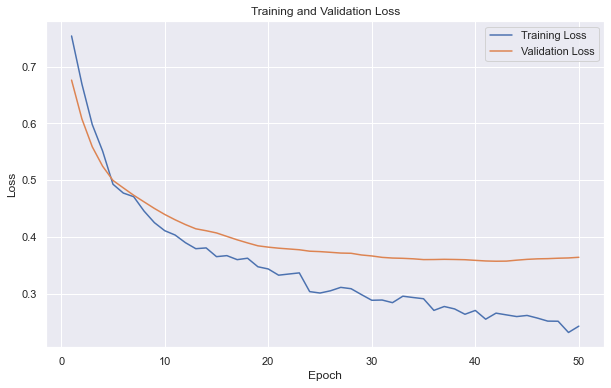

In [28]:
plt.figure(figsize=(10, 6))

EPOCHS = 50
epochs = range(1, EPOCHS + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Model Evaluation

In [29]:
pred = model.predict(X_test)
pred = tf.cast(tf.round(pred), dtype=tf.int32).numpy().reshape(61)

In [30]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack chances : [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0]


In [31]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 85.25%


In [32]:
print(f'Precision: {round(precision_score(y_test, pred), 2)}')

Precision: 0.87


We have a high precision score. This means that out of all the positive predicted values, majority of the values are actually positive

In [33]:
print(f'Recall: {round(recall_score(y_test, pred), 2)}')

Recall: 0.84


We also have a fairly decent recall score. This means that our model is doing a good job in capturing the positive cases

In [34]:
pred_1 = model.predict(X_test).reshape(61)

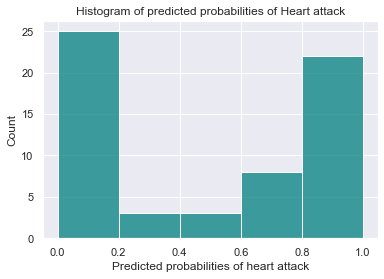

In [35]:
sns.histplot(pred_1, bins= 5, color= 'teal')
plt.title('Histogram of predicted probabilities of Heart attack')
plt.xlabel('Predicted probabilities of heart attack')
plt.show()

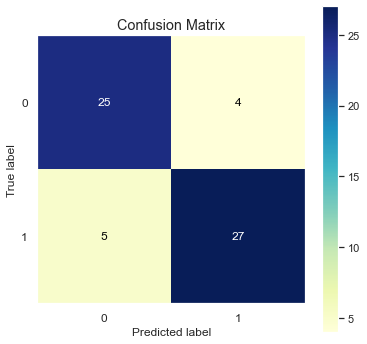

In [36]:
skplt.metrics.plot_confusion_matrix(y_test,pred, figsize=(6,6), cmap= 'YlGnBu');

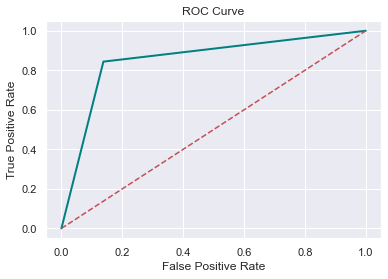

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [38]:
roc_auc = roc_auc_score(y_test, pred_1)
print('ROC AUC Score: {:.2f}'.format(roc_auc))

ROC AUC Score: 0.91


ROC AUC score of our model is very close to 1. So, we can conclude that our classifier did a good job in predicting whether a person has high chances of heart attack or not